In [17]:
import re
import pandas as pd
import numpy as np
import json
import requests

In [4]:
with open ("../../src/saved_data/zhuti_cls_res.json") as f:
    data = json.load(f)
data

[{'label': '公告',
  'name': '25省份公布经济半年报 14省份GDP增长由负转正',
  'hot': 77,
  'senlis': ['25省份公布经济半年报 14省份GDP增长由负转正hot:17',
   '[担保]中信建投:间接全资附属公司设立有担保的境外中期票据计划的公告 中信建投 : 关于间接全资附属公司设立有担保的境外中期票据计划hot:1',
   '原创      【读财报】睿创微纳：半年度净利润同比增逾3.7倍 近114亿市值今日解禁hot:1',
   '*ST东科:公司预挂牌转让液晶面板产业股权的公告 *ST东科 : 关于公司预挂牌转让液晶面板产业股权hot:1',
   '*ST东科:公司转让子公司股权暨关联交易的公告 *ST东科 : 关于公司转让子公司股权暨关联交易hot:1',
   '早间公告：*ST东科预挂牌转让液晶面板产业股权hot:3',
   '《中国漳州跨境电子商务综合试验区实施方案》印发hot:2',
   '魏尧任马钢集团董事长 丁毅任总经理hot:2',
   '南岸集团谢祖翔辞任执行董事 此前被提请罢免hot:5',
   '[停牌]博天环境:筹划重大事项涉及公司控制权变更停牌提示性公告 博天环境 : 关于筹划重大事项涉及公司控制权变更停牌提示性公告hot:1',
   '公告现大利好 周三8股有望大涨hot:1',
   '关于中银瑞利灵活配置混合型证券投资基金暂停大额申购、定期定额投资及转换转入业务的公告(2020/07/22) 中银瑞利混合A : 关于中银瑞利灵活配置混合型证券投资基金暂停大额申购、定期定额投资及.hot:1',
   '关于广发中证医疗指数分级证券投资基金实施转型的提示性公告 医疗分级 : 关于广发中证医疗指数分级证券投资基金实施转型的提示性公告hot:1',
   '关于富国新优享灵活配置混合型证券投资基金暂停大额申购、定投及转换转入业务的公告 富国新优享灵活配置混合A : 关于富国新优享灵活配置混合型证券投资基金暂停大额申购、定投及转换转入业务hot:1',
   '[分配]国联安增富一年定期开放纯债债券型发起式证券投资基金分红公告 国联安增富一年定开债券发起式 : 国联安增富一年定期开放纯债债券型发起式证券投资基金分红公告hot:1',
   '关于华润元大安

In [13]:
meiguo = data[1]

In [14]:
title_lis = meiguo["senlis"]
title_lis = [i[:-5] for i in title_lis]
title_lis

['【美国国防部长称计划年内访华】当地时间，美国国防部长马克埃斯珀连线英国智库"国际战略研究所"IISS并发表演讲，称希望年内实现任上首次访华，目的是"建立必要的危机沟通体系"。',
 '美国出现企业破产潮 上半年破产申请激增26%',
 '美国新冠肺炎确诊超388万例，特朗普呼吁美国人戴上口罩',
 '疫情最新消息！美国累计确诊超402万例 特朗普呼吁美国人戴上口罩 美疾控中心称美感染人数远超公布数据',
 '美国知名金融股普涨',
 '美国新冠肺炎确诊388万\xa0死亡超14万',
 '今日财经数据前瞻：美国成屋销售年化总数 欧洲央行行长拉加德发表讲话',
 '美国大型科技股普跌',
 '美国关税"大棒"没砸动欧洲',
 "美国知名男装Men\\'s Wearhouse母公司将裁员20%，关闭500家门店",
 '美国疫情反弹真够狠：数据坐火箭 终于想起口罩了',
 '美国疫情最新消息：美国累计确诊超402万例 美国正在酝酿逾万亿美元新刺激计划 美元跌至95关口 黄金站上1840',
 '美国疫情最新消息：美国感染人数远超公布数据6~24倍，美国确诊病例超402万例 死亡病例超14.5万例',
 '海外财经媒体焦点：美国上半年破产申请激增26%',
 '在美国上市的中国市场相关ETF普涨',
 '美国数万民众大罢工：原因系为提高工资呼吁社区平等',
 '疫情之下，美国理应接受世卫组织调查',
 '国际丨被问是否会对疫情中美国人死亡负责 特朗普：州长也要负责',
 '二次爆发影响美国经济修复节奏？美国抗疫的3个"真相"',
 '美军真正敌人已现身，要跟美国平起平坐，不是中国也不是俄罗斯',
 '特朗普承认：美国疫情好转之前会再恶化',
 '甘愿成为美国的帮凶，导弹将威胁半个中国，10分钟可摧毁沿海机场',
 '美国再将11家中企列入"实体清单"；滴滴筹备港股上市；马斯克跻身全球第五大富豪',
 '美国：疫情重创美国企业 破产申请数量激增',
 '美国对新冠疫情的糟糕应对 已成为全球经济持续复苏的最大风险',
 '被问是否会对疫情中美国人死亡负责 特朗普：州长也要负责',
 '疫情下美国企业破产率激增26% 上半年超3600家美企申请破产',
 '美国酝酿逾万亿美元新刺激计划',
 '疫情重创美国企业 超过3600家企业申请破产保护',
 '疫情重创美国企业， 上

In [18]:
respose = requests.post("http://127.0.0.1:5188/predict", json=title_lis)
batch_res = json.loads(respose.text)


In [20]:
zhuti_res=batch_res["zhuti_res"]
bert_vec = batch_res["sen_vec"]

In [22]:
bert_vec = np.array(bert_vec)
bert_vec.shape

(52, 768)

In [23]:
from sklearn.cluster import DBSCAN
import time

def func_dbs(X,e,s,m):
    time0 = time.time()
    db = DBSCAN(eps=e, min_samples=s,metric=m)
    db.fit(X)
#     print(np.sum(db.labels_))
    set1 = set(db.labels_)
    print(set1)
    print(len(set1))
    
    print(time.time()-time0)
    
    return db.labels_

In [77]:
o_labels = func_dbs(bert_vec,e=4,s=2,m="euclidean")


{0, 1, 2, -1}
4
0.0058629512786865234


In [78]:
o_labels

array([-1,  0,  1,  2,  0,  1,  0,  0,  0, -1,  0,  2,  2,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  2,  0,  0,  0,  1,  0,  1,  1,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
       -1])

In [79]:
res_dic={}
for _,i in enumerate(o_labels.tolist()):
    if i in res_dic:
        res_dic[i].append(title_lis[_])
    else:
        res_dic[i]=[title_lis[_]]

In [80]:
res_dic

{-1: ['【美国国防部长称计划年内访华】当地时间，美国国防部长马克埃斯珀连线英国智库"国际战略研究所"IISS并发表演讲，称希望年内实现任上首次访华，目的是"建立必要的危机沟通体系"。',
  "美国知名男装Men\\'s Wearhouse母公司将裁员20%，关闭500家门店",
  '甘愿成为美国的帮凶，导弹将威胁半个中国，10分钟可摧毁沿海机场',
  '美国LAlumina氧化铝厂即将关停',
  '"团结起来，对抗美国制裁"',
  '字节跳动部分美国投资人拟联手收购TikTok多数股权',
  '美国新冠病毒病例周二至少增加了64734例，达到392万例；新增死亡新冠病例1123例，总计142033例',
  '非美国也非伊朗 伊拉克新总理首次出访选择沙特却未能成行的背后有哪些故事？'],
 0: ['美国出现企业破产潮 上半年破产申请激增26%',
  '美国知名金融股普涨',
  '今日财经数据前瞻：美国成屋销售年化总数 欧洲央行行长拉加德发表讲话',
  '美国大型科技股普跌',
  '美国关税"大棒"没砸动欧洲',
  '美国疫情反弹真够狠：数据坐火箭 终于想起口罩了',
  '海外财经媒体焦点：美国上半年破产申请激增26%',
  '在美国上市的中国市场相关ETF普涨',
  '美国数万民众大罢工：原因系为提高工资呼吁社区平等',
  '疫情之下，美国理应接受世卫组织调查',
  '国际丨被问是否会对疫情中美国人死亡负责 特朗普：州长也要负责',
  '二次爆发影响美国经济修复节奏？美国抗疫的3个"真相"',
  '美军真正敌人已现身，要跟美国平起平坐，不是中国也不是俄罗斯',
  '特朗普承认：美国疫情好转之前会再恶化',
  '美国：疫情重创美国企业 破产申请数量激增',
  '美国对新冠疫情的糟糕应对 已成为全球经济持续复苏的最大风险',
  '被问是否会对疫情中美国人死亡负责 特朗普：州长也要负责',
  '美国酝酿逾万亿美元新刺激计划',
  '美国骚乱最新消息：芝加哥发生大规模枪击事件',
  '劲爆！美国两院两部连传重磅消息 美元坠崖、黄金欧元狂飙',
  '美国疫情反弹数据震惊全球 特朗普呼吁美国人戴上口罩',
  '美国感染人数远超公布数据',
  '美国感染人数远超公布数据 可能是报告病例10倍以上',
  '疫情下的美

In [81]:
from sklearn.manifold import TSNE
X = bert_vec
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(52, 2)

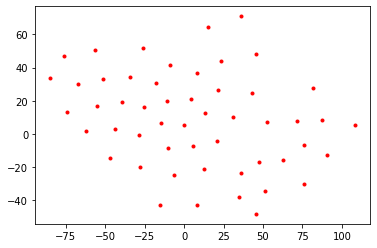

In [82]:
import matplotlib.pyplot as plt 
d=X_embedded
plt.plot(d[:,0],d[:,1],'r.')

plt.show()

In [86]:
.shape

(8, 2)

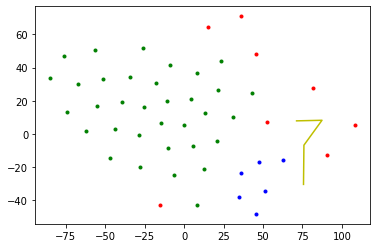

In [89]:
d=X_embedded[o_labels==-1]
plt.plot(d[:,0],d[:,1],'r.')
d=X_embedded[o_labels==0]
plt.plot(d[:,0],d[:,1],'g.')
d=X_embedded[o_labels==1]
plt.plot(d[:,0],d[:,1],'b.')
d=X_embedded[o_labels==2]
plt.plot(d[:,0],d[:,1],"y")

plt.show()